In [3]:
%%capture
%cd ..
from pprint import pprint
import matplotlib.pyplot as plt
import os

# Importing

In [4]:
from api import Benchmark

In [6]:
bench_dir = "cached/six_datasets_lw.json"
bench = Benchmark(bench_dir, cache=False)

==> Loading data...
==> No cached data found or cache set to False.
==> Reading json data...
==> Done.


# API exploration

### Queryable tags

Tags starting with "Train/" indicate metrics which are logged every epoch.

In [12]:
queriable_tags = bench.get_queriable_tags()
pprint(len(queriable_tags))

48


### Datasets

In [8]:
dataset_names = bench.get_dataset_names()
openml_task_ids = bench.get_openml_task_ids()

print(dataset_names)
print(openml_task_ids)

['Fashion-MNIST', 'adult', 'higgs', 'jasmine', 'vehicle', 'volkert']
[189908, 126025, 167200, 189862, 167168, 168331]


### Querying

In [9]:
# Get an example for a loss log
example_loss = bench.query(dataset_name="higgs", tag="Train/loss", config_id=0)

# Get the log of the accuracy for the run with the best peak accuracy
example_best_acc = bench.query_best("higgs", "Train/val_accuracy", "Train/val_accuracy", 0)

# Get the configuration of the best performing configuration
example_best_config = bench.query_best("higgs", "config", "Train/val_accuracy", 1)

print("Example loss log:\n", example_loss)
print("Best validation accuracy log:\n", example_best_acc)
print("Best config with regard to validation accuracy:\n", example_best_config)

Example loss log:
 [0.7022241950035095, 0.6901828646659851, 0.6828941702842712, 0.6783701181411743, 0.674620509147644, 0.6713433265686035, 0.6683977246284485, 0.6656985878944397, 0.6632551550865173, 0.6610167622566223, 0.6589627861976624, 0.6570730805397034, 0.6553987860679626, 0.6539356708526611, 0.6525501608848572, 0.6513078808784485, 0.650172233581543, 0.6491538882255554, 0.648234486579895, 0.6474276185035706, 0.6466533541679382, 0.6459929347038269, 0.6453624367713928, 0.6447970271110535, 0.6442720890045166, 0.6438338160514832, 0.6434042453765869, 0.6430007815361023, 0.6426441669464111, 0.6423296928405762, 0.6420345306396484, 0.6417556405067444, 0.6414902806282043, 0.6412926912307739, 0.6411048173904419, 0.6409232020378113, 0.6407663822174072, 0.6406413316726685, 0.6405110359191895, 0.640395998954773, 0.6403017640113831, 0.6402287483215332, 0.6401697993278503, 0.6400859951972961, 0.6400653719902039, 0.6400305032730103, 0.6400076746940613, 0.6399728059768677, 0.6399630904197693, 0.63

### Plotting

The _plot\__by\__name_ method allows you to quickly look at some logs for a number of datasets.

In [10]:
help(bench.plot_by_name)

Help on method plot_by_name in module api:

plot_by_name(dataset_names, x_col, y_col, n_configs=10, show_best=False, xscale='linear', yscale='linear', criterion=None) method of api.Benchmark instance
    Plot multiple datasets and multiple runs.
    
    Keyword arguments:
    dataset_names -- list
    x_col -- str, tag to plot on x-axis
    y_col -- str, tag to plot on y-axis
    n_configs -- int, number of configs to plot for each dataset
    show_best -- bool, weather to show the n_configs best (according to query_best())
    xscale -- str, set xscale, options as in matplotlib: "linear", "log", "symlog", "logit", ...
    yscale -- str, set yscale, options as in matplotlib: "linear", "log", "symlog", "logit", ...
    criterion -- str, tag used as criterion for query_best()



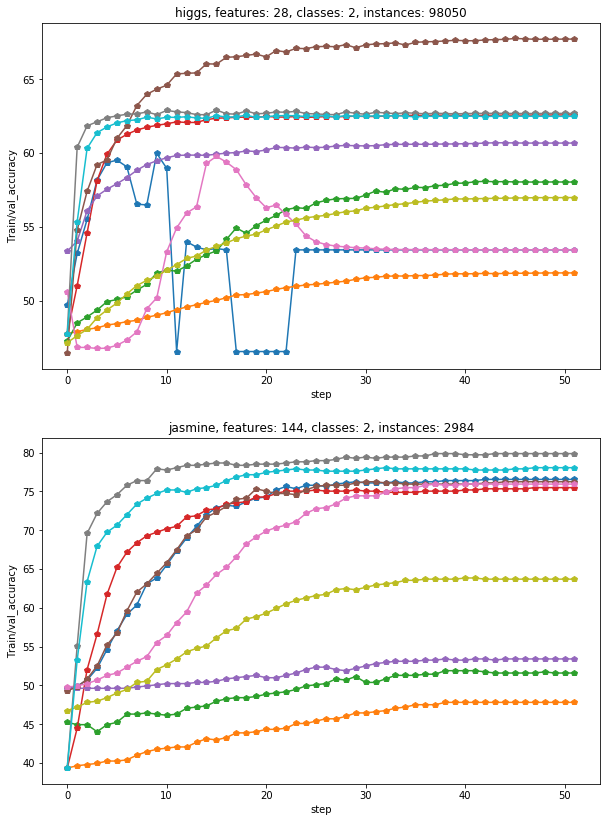

In [11]:
bench.plot_by_name(dataset_names=["higgs", "jasmine"],
                   x_col="epoch",
                   y_col="Train/val_accuracy",
                   n_configs=10,
                   xscale='linear',
                   yscale='linear',
                   show_best=False)